In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/081d1e25-3f06-46a1-95ef-d10a62faa80f___GHLB2 Leaf 8600_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/e6703c22-86f7-4bdf-9733-072180761976___RS_Late.B 5522_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/9f946f43-424a-41be-9f91-b14fa3f2b37a___GHLB2 Leaf 8892_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/dfc45d56-7ecb-46a5-b9da-9297df393f7b___RS_Late.B 6928_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/84b7d3ab-56ae-4eef-a852-7b32f3ef0160___GHLB2 Leaf 150_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/a5fe1111-38b0-4206-9ac7-3eec701beb79___GHLB2 Leaf 8868_final_masked.jpg
/kaggle/input/plantvillage-dataset/segmented/Tomato___Late_blight/e5b81597-d794-40e5-8f14-0b5792c4a680___RS_Late.B 6757_final_masked.jpg
/kaggle/input/plantvillage-dataset/seg

In [23]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns 
from PIL import Image 

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import models , layers

In [10]:
print(len(os.listdir("/kaggle/input/plantvillage-dataset/segmented")))
print(os.listdir("/kaggle/input/plantvillage-dataset/segmented")[:5])

print(len(os.listdir("/kaggle/input/plantvillage-dataset/grayscale")))
print(os.listdir("/kaggle/input/plantvillage-dataset/grayscale")[:5])

print(len(os.listdir("/kaggle/input/plantvillage-dataset/color")))
print(os.listdir("/kaggle/input/plantvillage-dataset/color")[:5])

38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']


In [11]:
print(len(os.listdir("/kaggle/input/plantvillage-dataset/color/Grape___healthy")))
print(os.listdir("/kaggle/input/plantvillage-dataset/color/Grape___healthy")[:5])

423
['71af6c2b-b3ed-4629-8aaa-7b60187caee1___Mt.N.V_HL 9069.JPG', '244804b5-05e2-4372-a376-36a0655aff41___Mt.N.V_HL 6121.JPG', '4b266fb8-a762-4073-a9e2-25a3861115c4___Mt.N.V_HL 6152.JPG', '4bd0c235-94b2-4d5d-a76e-58df595e7802___Mt.N.V_HL 6032.JPG', '12331981-d038-4eb0-a1c6-64b27f226cab___Mt.N.V_HL 6106.JPG']


# Data Preprocessing 

In [14]:
# DataSet Path 

base_dir = "/kaggle/input/plantvillage-dataset/color"

(256, 256, 3)


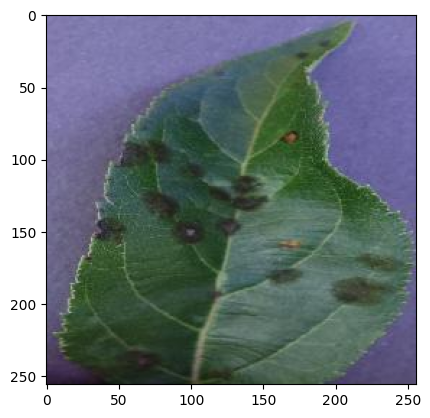

In [16]:
image_path ="/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG"

img = mping.imread(image_path)

print(img.shape)

plt.imshow(img)

In [17]:
# Image Parameter 

img_size = 224 
batch_size = 32 

# Train Test Split 

In [19]:
# Image Data Generators 

data_gen = ImageDataGenerator (
    rescale = 1./255 , 
    validation_split = 0.2 
)

In [20]:
# Train Generator 

train_generator = data_gen.flow_from_directory (
    base_dir , 
    target_size = (img_size , img_size) , 
    batch_size = batch_size , 
    subset = 'training' , 
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [21]:
# Val Generator 

validation_generator = data_gen.flow_from_directory (
    base_dir , 
    target_size = (img_size , img_size) , 
    batch_size = batch_size , 
    subset = 'validation' , 
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


# CNN Model Building 

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(32 , (3,3) , activation='relu' , input_shape = (img_size , img_size , 3 )))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64 , (3,3) , activation='relu' ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dense(train_generator.num_classes , activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753381868.842340      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [25]:
# model Summary 

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model 

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# Model Training 

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=3,              
    restore_best_weights=True  # Optionally restore the weights from the best epoch
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stop]   # ← Add the callback here
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 99s 73ms/step - accuracy: 0.9525 - loss: 0.1450 - val_accuracy: 0.8804 - val_loss: 0.4399
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 72ms/step - accuracy: 0.9737 - loss: 0.0836 - val_accuracy: 0.8364 - val_loss: 0.6459
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.9779 - loss: 0.0642 - val_accuracy: 0.8585 - val_loss: 0.6556
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 71ms/step - accuracy: 0.9844 - loss: 0.0469 - val_accuracy: 0.8709 - val_loss: 0.6164


# Model Evaluation 

In [31]:
# Model Evaluation 
print("Evaluating Model ... ")
val_loss , val_accuracy = model.evaluate(validation_generator  , steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy : {val_accuracy * 100 }")

Evaluating Model ... 
339/339 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8792 - loss: 0.4491
Validation Accuracy : 88.04388046264648


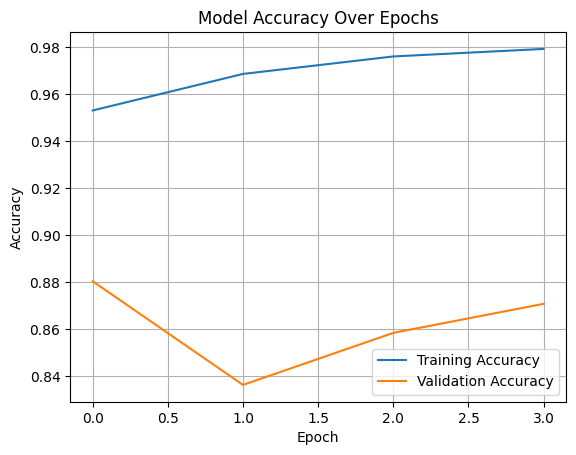

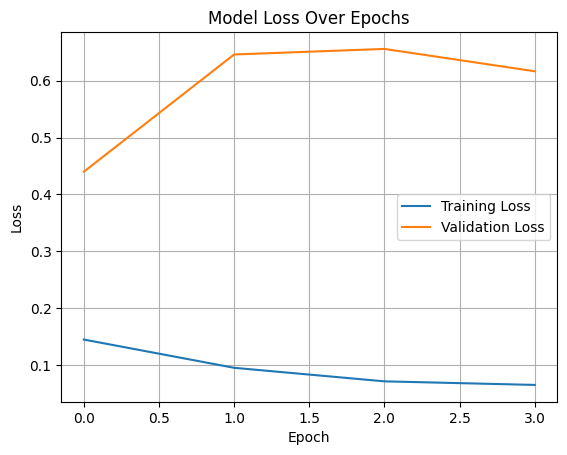

In [32]:
# Plot training & validation accuracy values 

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the model 

In [35]:
model.save("/kaggle/working/plant_disease_prediction_model.h5")
model.save("/kaggle/working/plant_disease_prediction_model.keras")


In [36]:
from IPython.display import FileLink
FileLink('plant_disease_prediction_model.h5')


/kaggle/working/plant_disease_prediction_model.h5